In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\admin\anaconda3\lib\site-packages (3.7)



In [2]:
import nltk
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x000001B6F76F9ED0>>

# 1. Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
import scipy.sparse

In [4]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='Liked', ylabel='count'>

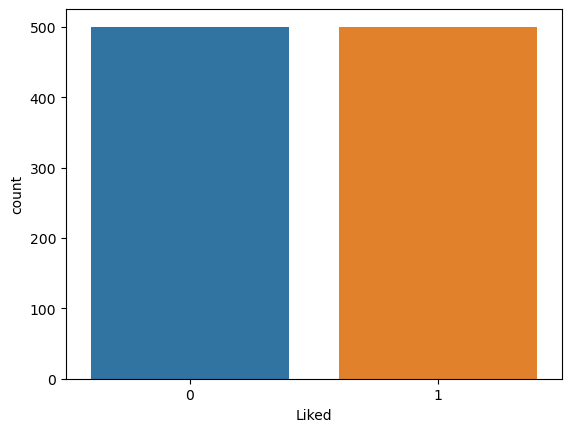

In [6]:
sns.countplot(x='Liked', data=data)

## 2. Preprocessing Data

In [7]:
data['Review'][25] #before 

"That's right....the red velvet cake.....ohhh this stuff is so good."

In [8]:
def preprocessor(text):
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)(...)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-','')
    return text

In [9]:
data['Review'] = data['Review'].apply(preprocessor)

In [10]:
data['Review'][25] #after

'that s right the red velvet cake ohhh this stuff is so good '

## 3. Tokenization

In [11]:
data['Review'][1] #before tokenizing

'crust is not good '

In [12]:
def tokenizer(text):
    return text.split()

In [13]:
data['Review'] =data['Review'].apply(tokenizer)

In [14]:
data['Review'][1] #after tokenizing

['crust', 'is', 'not', 'good']

# 4. Stemming

In [15]:
data['Review'][0] #before stemming

['wow', 'loved', 'this', 'place']

In [16]:
snowball = SnowballStemmer("english")

In [17]:
def stem_it(text):
    return [snowball.stem(word) for word in text]

data['Review'] = data['Review'].apply(stem_it)

In [18]:
data['Review'][0] #after stemming

['wow', 'love', 'this', 'place']

#  Stopwords Removal

In [19]:
stop_words = set(['a', 't', 'd', 'y', 'it', 'that'])
def stop_it(text):
    return [word for word in text if word not in stop_words]

In [20]:
data['Review'] = data['Review'].apply(stop_it)
data.head()

,Review,Liked
0,"[wow, love, this, place]",1
1,"[crust, is, not, good]",0
2,"[not, tasti, and, the, textur, was, just, nasti]",0
3,"[stop, by, dure, the, late, may, bank, holiday...",1
4,"[the, select, on, the, menu, was, great, and, ...",1


In [21]:
data['Review'] = data['Review'].apply(' '.join)
data.head()

,Review,Liked
0,wow love this place,1
1,crust is not good,0
2,not tasti and the textur was just nasti,0
3,stop by dure the late may bank holiday off ric...,1
4,the select on the menu was great and so were t...,1


# Transform Text Data into TF-IDF Vectors

In [22]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(data['Review'])
y = data['Liked'].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=False)

# Classification using Logistic Regression

In [24]:
# Check if x_train is sparse and convert to dense if necessary
if scipy.sparse.issparse(x_train):
    print("Converting sparse matrix to dense format...")
    x_train = x_train.toarray()
else:
    print("Data is already in dense format.")

# Verify the conversion
print("Data type after conversion:", type(x_train))
print("Shape of x_train:", x_train.shape)

# Check for NaN or infinite values
print("Checking for NaN or infinite values...")
if np.any(np.isnan(x_train)):
    print("NaN values found in x_train")
    x_train = np.nan_to_num(x_train)  # Optionally, handle NaN values
if np.any(np.isinf(x_train)):
    print("Infinite values found in x_train")
    x_train = np.where(np.isinf(x_train), 0, x_train)  # Optionally, handle infinite values

# Check the data type of x_train
print("Data type of x_train:", x_train.dtype)

# Ensure data type is float
x_train = x_train.astype(np.float64)

# Check the final state of x_train
print("Final check - Data type:", x_train.dtype, "Shape:", x_train.shape)

# Ensure y_train is a numpy array
y_train = np.asarray(y_train)
print("Converted y_train to numpy array.")

# Check y_train properties
print("Shape of y_train:", y_train.shape)
print("Data type of y_train:", y_train.dtype)
print("Number of samples in x_train:", x_train.shape[0])
print("Number of labels in y_train:", len(y_train))

# Use a simple LogisticRegression model for debugging
try:
    simple_lr = LogisticRegression(max_iter=1000)
    simple_lr.fit(x_train, y_train)
    print("Simple LogisticRegression model fitted successfully.")
except Exception as e:
    print("An error occurred during simple model fitting:", e)

# If simple model works, try LogisticRegressionCV
try:
    lr = LogisticRegressionCV()
    lr.fit(x_train, y_train)
    print("LogisticRegressionCV model fitted successfully.")
    print("Model trained and saved successfully.")
except Exception as e:
    print("An error occurred during LogisticRegressionCV fitting:", e)


Converting sparse matrix to dense format...
Data type after conversion: <class 'numpy.ndarray'>
Shape of x_train: (800, 1685)
Checking for NaN or infinite values...
Data type of x_train: float64
Final check - Data type: float64 Shape: (800, 1685)
Converted y_train to numpy array.
Shape of y_train: (800,)
Data type of y_train: int64
Number of samples in x_train: 800
Number of labels in y_train: 800
Simple LogisticRegression model fitted successfully.
LogisticRegressionCV model fitted successfully.
Model trained and saved successfully.


In [25]:
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_pred, y_test)*100
print("Accuracy: ", acc_log)

Accuracy:  83.5


In [26]:
import joblib
joblib.dump(lr, 'logistic_regression_cv_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']